#EXO:-1
Run the following code for activating tensorflow version 2.0:

In [ ]:
try :
# % tensorflow_version only exists in Colab .
  % tensorflow_version 2. x
except Exception :
  pass

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2. x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


# EXO:-2
 Import tensorflow, keras, numpy and matplot using the following code:


In [ ]:
from __future__ import absolute_import , division , print_function ,unicode_literals

# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib . pyplot as plt


#Exo:-3 
Check your tensorflow version using:


In [ ]:
print(tf.__version__)

2.4.1


The output should be 2. or higher.
Output is 2.4.0

#Exo:- 4 
Import the cifra10 data set. TheThe CIFAR-10 dataset consists of
60000 32 × 32 colour images in 10 classes, with 6000 images per class. There
are 50000 training images and 10000 test images: https://www.tensorflow.
org/datasets/catalog/cifar10

In [ ]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170500096/170498071 [==============================] - 2s 0us/step


#Exo:- 5 
Before using a dataset, the datatype should be checked. 
### Test type(cifar10 data)
for verifying the variable type. 
### len(cifar10 data) 
is another command for checking the data size.


In [ ]:
type(cifar10_data)

tuple

In [ ]:
len(cifar10_data)

2

#Exo:- 6 
Load train and test images and labels with:


In [ ]:
(train_images,train_labels) ,(test_images,test_labels) = cifar10_data
train_images.shape

(50000, 32, 32, 3)

### Loading the dataset returns four NumPy arrays:- 

*   The train images and train labels arrays are the training set, the data the model uses to learn.
*   The model is tested against the test set, the test images, and test labels
arrays.

# Exo:- 7 
The images are 32 × 32 NumPy arrays, with pixel values ranging from 0
to 255. You can check an example with:

In [ ]:
print(train_images[0])
print(train_images[0].shape )
print(train_labels)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


The labels are an array of integers, ranging from 0 to 9. Check it with your
own code. Each image is mapped to a single label. Since the class names are
not included with the dataset, store them here to use later when plotting the
images: (check the dataset link for more detailed information: https://www.cs.toronto.edu/%7Ekriz/cifar.html)


In [ ]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
class_names = [ 'airplane' , 'automobile' , 'bird' , 'cat' , 'deer', 'dog' , 'frog' , 'horse' , 'ship' , 'truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#Exo:- 8
(Explore the data) Before training the model, explore the datasets.
Number of train and test points, their array size and etc. You can use len()
and arrrayName.shape() for verifying the train and test datasets. 1


In [ ]:
print(len(train_images))
print(len(test_images))
print(train_images.shape)
print(test_images.shape)

50000
10000
(50000, 32, 32, 3)
(10000, 32, 32, 3)


#Exo:- 9
(Preprocess the data): An interesting fact about the image is that
you can plot the image. It is possible using the following:

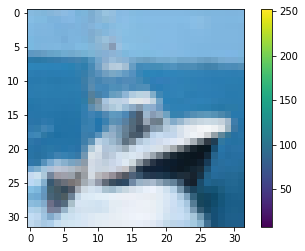

array([8], dtype=uint8)

In [ ]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()
train_labels[index]

#Exo:- 10
To verify that the data is in the correct format and that you’re ready to
build and train the network, let’s display the first 25 images from the training
set and display the class name below each image. To do so use the following
commands:

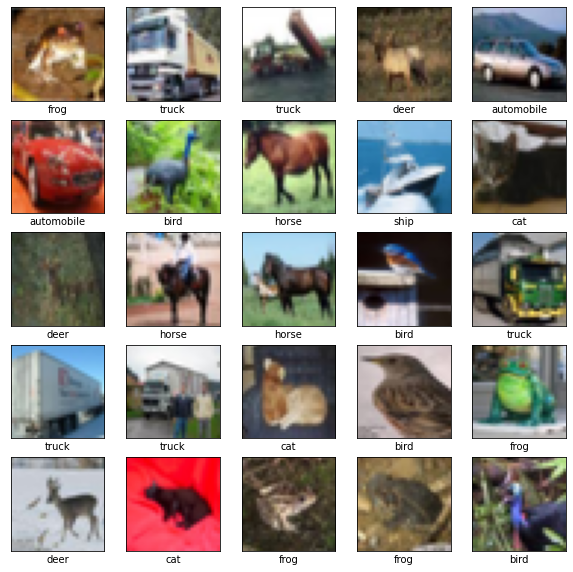

In [ ]:
# showing 25 images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

#Exo:- 11
You can check various images by changing the index value, or by calling
test images. You can see that the pixel values fall in the range of 0 to 255.
normalise train and test sets using the following code:

In [ ]:

train_images = train_images / 255.0
train_images

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.76470588, 0.80392157, 0.75686275],
         [0.83137255, 0.87843137, 0.8       ],
         [0.71372549, 0.76078431, 0.65490196]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.66666667, 0.69019608, 0.58823529],
         [0.63137255, 0.65882353, 0.50980392],
         [0.57254902, 0.60392157, 0.44313725]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.74117647, 0.78039216, 0.6627451 ],
         [0.65098039, 0.69803922, 0.50980392],
         [0.4745098 , 0.52156863, 0.34117647]],

        ...,

        [[0.58039216, 0.7254902 , 0.30980392],
         [0.55686275, 0.71372549, 0.22352941]

Building a neural network in general requires configuring the layers of the model,
then compiling the model. The basic building block of a neural network is the
layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand. Most of
deep learning consists of chaining together simple layers. Most layers, such as
tf.keras.layers.Dense, have parameters that are learned during training.

#Exo:- 12
First neural network definition with three layers and two activation
functions2

In [ ]:
model = keras.Sequential ([
keras.layers.Flatten (input_shape =(32 , 32 , 3) ) , # input layer
keras.layers.Dense (128 , activation ='relu') , # hidden layer
keras.layers.Dense (10 , activation ='softmax') ]) # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
total_params=(128*3072+1*128)+(10*128+1*10) # for each layer, current_layer_shape*previous_layer_shape+1*current_layer_shape
total_params

394634

The first layer in this network, tf.keras.layers.Flatten, transforms the
format of the images from a two-dimensional array (of 32 by 32 pixels) to a onedimensional array (of 32 × 32 = 1024 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
After the pixels are flattened, the network consists of a sequence of two
tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons).
The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
In this exercise, we don’t explain the reasons of defining a neural network with
this structure. For defining a network compatible with our data, we should
define an input layer with the same size as the input data (images size) and an
output corresponding the output data (image labels).

#Exo:- 13
Before the model is ready for training, it needs a few more settings.
These are added during the model’s compile step (We will explain the following parts in details during the future sections. Use them here as an example,
because it is necessary for NN trainings):

*   Loss function —This measures how accurate the model is during training.
You want to minimize this function to ”steer” the model in the right
direction.
*   Optimizer —This is how the model is updated based on the data it sees
and its loss function
*   Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly
classified.





#Exo:- 14
Train the model: Training the neural network model requires the
following steps:-

*   Feed the training data to the model. In this example, the training data is in the train images and train labels arrays.
*   The model learns to associate images and labels.
*   You ask the model to make predictions about a test set, in this example,
the test images array. Verify that the predictions match the labels from
the test labels array.

In [ ]:
model.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])


To start training, call the model.fit method, so called because it "fits" the model to the training data:-

In [ ]:
 model.fit(train_images, train_labels, epochs =10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0212 - accuracy: 0.2821
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7759 - accuracy: 0.3679
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7043 - accuracy: 0.3904
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6530 - accuracy: 0.4094
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6366 - accuracy: 0.4157
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6230 - accuracy: 0.4213
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6123 - accuracy: 0.4205
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6054 - accuracy: 0.4272
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5875 - accuracy: 0.4315
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.576

epochs will be explained in the future sections too.

#Exo:- 15
Evaluate Accuracy: It is the moment for checking the model performance on the test dataset.

In [ ]:
test_loss, test_acc = model.evaluate(test_images , test_labels ,verbose =2)


313/313 - 1s - loss: 241.6378 - accuracy: 0.3579


verbose is an Integer value containing 0, 1, or 2. Verbosity mode. 0 = silent,
1 =progress bar, 2 = one line per epoch. We remind you checking the Keras
documentation for more details on any part of the code: https://keras.io/.
Check the test loss and accuracy in your code.

#Exo:- 16
Make predictions : With the model trained, we can use it to make prediction about some images.

In [ ]:
predictions = model.predict ( test_images )
predictions

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00130395, 0.        , 0.        , ..., 0.998696  , 0.        ,
        0.        ]], dtype=float32)

The model predicts a label for each image in the testing set. Print the first,
second and third element of the predicted test sets. You can see that each
element contains 10 values indicating a probability of each label. Choose the
maximum one using np.argmax() function. Compare the predicted label of the
first three elements with their predicted labels. How many are correct?

---



In [ ]:
print(predictions[0],"\n",predictions[1],"\n",predictions[2])
for i in range(3):
  print("predicted label for element",i,":",np.argmax(predictions[i]))

[0.0000000e+00 0.0000000e+00 0.0000000e+00 9.0182274e-18 0.0000000e+00
 3.1872517e-26 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00] 
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
predicted label for element 0 : 8
predicted label for element 1 : 8
predicted label for element 2 : 8


*So*, in first element, the value at index 8 is having the highest probability 1
and the same result we got from np.argmax

#Exo:- 17
Write a function for checking the predicted labels. The result should
be similar to the above Figure with a label indicating the probability of the
predicted label with blue color if the prediction is correct otherwise in the red
color?


In [ ]:
pred_labels=[np.argmax(element) for element in predictions]
print(pred_labels[:5])
print(test_labels[:5])


[8, 8, 8, 8, 4]
[[3]
 [8]
 [8]
 [0]
 [6]]


In [ ]:
def verify_pred(index):
  status='red'
  if(class_names[test_labels[index][0]]==class_names[pred_labels[index]]):
    status='blue'
  plt.imshow(test_images[index])
  percentage = str(round(max(predictions[index])*100,2))
  plt.xlabel('{}%, ({})'.format(percentage,class_names[pred_labels[i]]),fontsize=10,color=status)


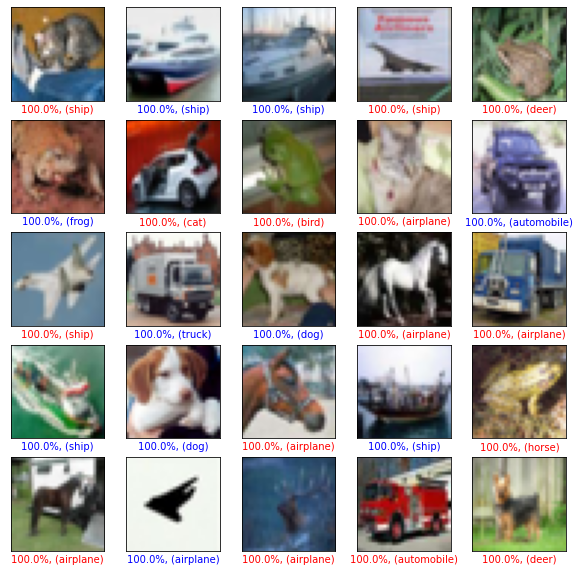

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    verify_pred(i)
    plt.xticks ([])
    plt.yticks ([])

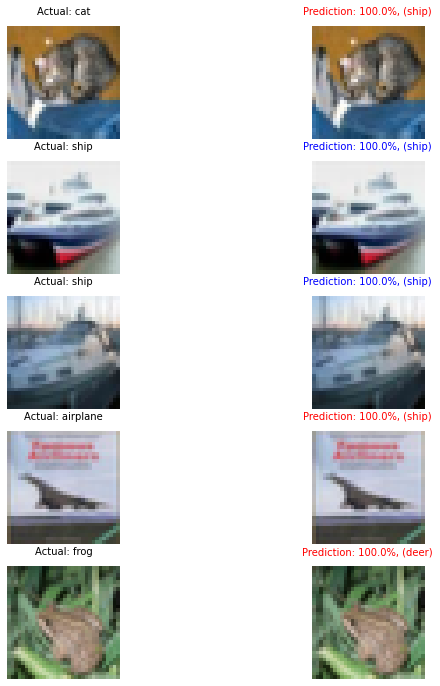

In [ ]:
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(10,12),sharey=True)
for i in range(5):
  ax[i][0].set_title('Actual: {}'.format(class_names[test_labels[i][0]]),fontsize=10)
  ax[i][0].matshow(test_images[i])
  ax[i][0].axis('off')
  percentage = str(round(max(predictions[i])*100,2))
  if(class_names[test_labels[i][0]]==class_names[pred_labels[i]]):
    ax[i][1].set_title('Prediction: {}%, ({})'.format(percentage,class_names[pred_labels[i]]),fontsize=10,color='blue')
  else:
    ax[i][1].set_title('Prediction: {}%, ({})'.format(percentage,class_names[pred_labels[i]]),fontsize=10,color='red')
  ax[i][1].matshow(test_images[i])
  ax[i][1].axis('off')

#Exo:- 18
Grab a single element from the test set such as test images[5]. Send
it to the model.predict() and check what will happen. Why? Correct it by
your modification. (hint: you can use expand dims())


In [ ]:
# model.predict(test_images[5])
# Above line will not work because for model, the input shape (10000, 32, 32, 3) is not matching(32, 32, 3) 
test_img=np.expand_dims(test_images[5], axis=0)
model.predict(test_img)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

#Exo:- 19 
Respecting input and output sizes, try to change your model structure in exercises 12 and 13 and observe their affections on prediction precision

In [ ]:
model2 = keras.Sequential ([
keras.layers.Flatten (input_shape =(32 , 32 , 3) ) ,
keras.layers.Dense (512 , activation ='relu') ,
keras.layers.Dense (128 , activation ='relu') , # By adding more layers trying to improve model
keras.layers.Dense (10 , activation ='softmax') ])

model2.compile(optimizer ='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy'])

model2.fit(train_images, train_labels, epochs =10)
test_loss, test_acc = model.evaluate(test_images , test_labels ,verbose =2)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.0215 - accuracy: 0.2748
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7050 - accuracy: 0.3864
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6088 - accuracy: 0.4224
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5466 - accuracy: 0.4493
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5041 - accuracy: 0.4633
Epoch 6/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.4712 - accuracy: 0.4737
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4386 - accuracy: 0.4833
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4269 - accuracy: 0.4940
Epoch 9/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.3952 - accuracy: 0.5029
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model.predict ( test_images )
pred_labels=[np.argmax(element) for element in predictions]
predictions

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00130395, 0.        , 0.        , ..., 0.998696  , 0.        ,
        0.        ]], dtype=float32)

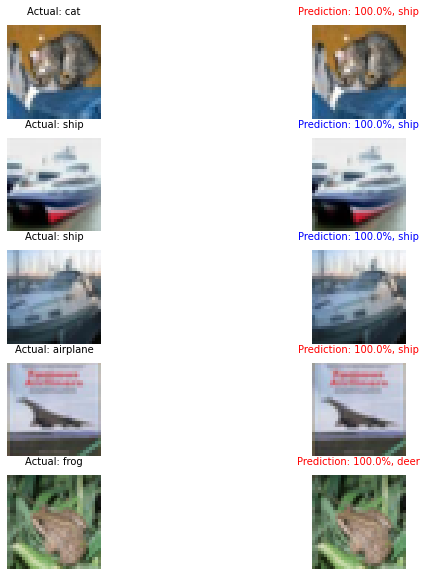

In [ ]:
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(10,10),sharey=True)
for i in range(5):
  ax[i][0].set_title('Actual: {}'.format(class_names[test_labels[i][0]]),fontsize=10)
  ax[i][0].matshow(test_images[i])
  ax[i][0].axis('off')
  percentage = str(round(max(predictions[i])*100,2))
  if(class_names[test_labels[i][0]]==class_names[pred_labels[i]]):
    ax[i][1].set_title('Prediction: {}%, {}'.format(percentage,class_names[pred_labels[i]]),fontsize=10,color='blue')
  else:
    ax[i][1].set_title('Prediction: {}%, {}'.format(percentage,class_names[pred_labels[i]]),fontsize=10,color='red')
  ax[i][1].matshow(test_images[i])
  ax[i][1].axis('off')

#Exo:- 20
Choose another image classification dataset from Tensorflow available
datasets https://www.tensorflow.org/datasets/catalog/overview and predict a classification function for it.

In [ ]:
data2 = keras.datasets.cifar100
cifar100_data = data2.load_data()
len(cifar100_data)


169009152/169001437 [==============================] - 2s 0us/step


2

In [ ]:
(train_images,train_labels) ,(test_images,test_labels) = cifar100_data
print(train_images)
print(train_images.shape )

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [195 205 193]
   [212 224 204]
   [182 194 167]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   [170 176 150]
   [161 168 130]
   [146 154 113]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [189 199 169]
   [166 178 130]
   [121 133  87]]

  ...

  [[148 185  79]
   [142 182  57]
   [140 179  60]
   ...
   [ 30  17   1]
   [ 65  62  15]
   [ 76  77  20]]

  [[122 157  66]
   [120 155  58]
   [126 160  71]
   ...
   [ 22  16   3]
   [ 97 112  56]
   [141 161  87]]

  [[ 87 122  41]
   [ 88 122  39]
   [101 134  56]
   ...
   [ 34  36  10]
   [105 133  59]
   [138 173  79]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [ ]:
print(test_images)
print(test_images.shape )

[[[[199 215 249]
   [196 211 244]
   [195 210 243]
   ...
   [216 231 250]
   [217 231 250]
   [224 234 252]]

  [[197 210 239]
   [195 208 238]
   [195 210 240]
   ...
   [231 243 250]
   [233 243 250]
   [241 245 253]]

  [[222 226 246]
   [213 220 242]
   [209 219 243]
   ...
   [243 250 251]
   [244 249 251]
   [250 250 253]]

  ...

  [[ 72  73  99]
   [ 71  74 102]
   [ 74  78 108]
   ...
   [220 208 217]
   [183 168 181]
   [155 141 150]]

  [[ 72  75 104]
   [ 76  81 111]
   [ 84  89 122]
   ...
   [222 212 220]
   [187 174 192]
   [145 132 149]]

  [[ 80  85 118]
   [ 84  90 123]
   [ 85  92 127]
   ...
   [217 207 215]
   [207 194 211]
   [176 164 183]]]


 [[[113 130  98]
   [ 88 105  73]
   [ 72  89  58]
   ...
   [105 124  93]
   [ 86 106  74]
   [ 63  82  55]]

  [[ 95 113  80]
   [ 78  97  64]
   [ 62  80  49]
   ...
   [103 122  84]
   [ 89 109  70]
   [ 65  83  49]]

  [[ 79  97  62]
   [ 65  82  49]
   [ 52  67  37]
   ...
   [ 65  79  52]
   [ 62  79  51]
   [ 49  64

In [ ]:
print(train_labels)


[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]


In [ ]:
print(test_labels)

[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


In [ ]:
print(len(train_images))
print(len(test_images))
print(train_images.shape)
print(test_images.shape)

50000
10000
(50000, 32, 32, 3)
(10000, 32, 32, 3)


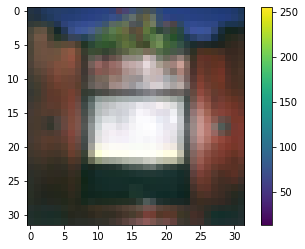

array([87])

In [ ]:
index = 132
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()
train_labels[index]